# Gráficos em Python

# PCM - Modulação por Código de Pulsos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, butter, hilbert
from scipy.io.wavfile import write

# 1. PCM - Modulação por Código de Pulsos
fs = 8000  # Taxa de amostragem
T = 1  # Duração do sinal em segundos
t = np.linspace(0, T, fs*T, endpoint=False)
sinal = np.sin(2 * np.pi * 5 * t)  # Sinal de teste

niveis = 16  # Número de níveis de quantização
sinal_quantizado = np.round((sinal + 1) * (niveis/2)) / (niveis/2) - 1

plt.figure()
plt.plot(t[:100], sinal[:100], label="Original")
plt.step(t[:100], sinal_quantizado[:100], label="Quantizado", where='mid')
plt.title("PCM - Modulação por Código de Pulsos")
plt.legend()
plt.show()

# DPCM - PCM Diferencial

In [ ]:
sinal_diferenca = np.diff(sinal_quantizado, prepend=sinal_quantizado[0])
plt.figure()
plt.plot(t[:100], sinal_diferenca[:100], label="DPCM")
plt.title("DPCM - PCM Diferencial")
plt.legend()
plt.show()

# LPC - Codificação Preditiva Linear

In [ ]:
from scipy.linalg import toeplitz, solve

def lpc(sinal, ordem=2):
    r = np.correlate(sinal, sinal, mode='full')[len(sinal)-1:]
    R = toeplitz(r[:ordem])
    a = solve(R, -r[1:ordem+1])
    return np.concatenate(([1], a))

coeficientes = lpc(sinal, ordem=2)
plt.figure()
plt.stem(coeficientes)
plt.title("Coeficientes LPC")
plt.show()

# Geração de Sinais DTMF

In [ ]:
frequencias = [(697, 1209), (770, 1336), (852, 1477), (941, 1633)]  # Exemplo
fs = 8000  # Taxa de amostragem
t = np.linspace(0, 0.5, int(0.5 * fs), endpoint=False)
dtmf_signal = np.sin(2 * np.pi * frequencias[0][0] * t) + np.sin(2 * np.pi * frequencias[0][1] * t)

plt.figure()
plt.plot(t[:500], dtmf_signal[:500])
plt.title("Sinal DTMF")
plt.show()

# Modulação Digital Binária (ASK)

In [ ]:
bits = np.random.randint(0, 2, 100)
t = np.linspace(0, 1, 100)
portadora = np.sin(2 * np.pi * 5 * t)
ask_signal = bits * portadora

plt.figure()
plt.plot(t, ask_signal)
plt.title("Modulação ASK")
plt.show()

# Espectro Espalhado FHSS

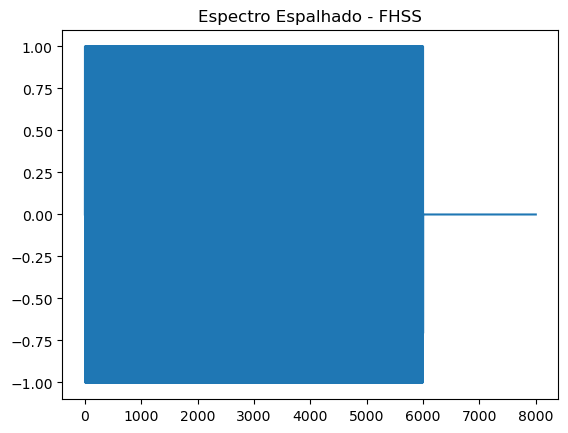

In [6]:
frequencias_hopping = [1000, 2000, 3000, 4000]
fs = 8000
sinal_hopping = np.zeros(fs)
for i in range(4):
    f = frequencias_hopping[i]
    t = np.linspace(i/4, (i+1)/4, fs//4, endpoint=False)
    sinal_hopping[i*(fs//4):(i+1)*(fs//4)] = np.sin(2 * np.pi * f * t)

plt.figure()
plt.plot(sinal_hopping)
plt.title("Espectro Espalhado - FHSS")
plt.show()
